# 1.  Standard Scaling
standard scaling is a 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,minmax_scale,maxabs_scale,MinMaxScaler,MaxAbsScaler

In [2]:
# Make an example dataset

df={
    'Age': [25, 30, 35, 40, 45],
    'Height': [79,68,90,78,100],
    'Weight': [11, 12, 13, 14, 15],
     
}
df=pd.DataFrame(df)
df

,Age,Height,Weight
0,25,79,11
1,30,68,12
2,35,90,13
3,40,78,14
4,45,100,15


In [4]:
# import the scalar

scalar=StandardScaler()
# fit the scaler to the data
scaled_df=scalar.fit_transform(df )
scaled_df

array([[-1.41421356, -0.36393726, -1.41421356],
       [-0.70710678, -1.36476473, -0.70710678],
       [ 0.        ,  0.63689021,  0.        ],
       [ 0.70710678, -0.45492158,  0.70710678],
       [ 1.41421356,  1.54673337,  1.41421356]])

In [5]:
# convert it into dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,Age,Height,Weight
0,-1.414214,-0.363937,-1.414214
1,-0.707107,-1.364765,-0.707107
2,0.000000,0.636890,0.000000
3,0.707107,-0.454922,0.707107
4,1.414214,1.546733,1.414214


## Min MAx scaler range(0-1)

In [8]:
# min max  scalar
scalar=MinMaxScaler()
# fit the scaler to the data
scaled_df=scalar.fit_transform(df )
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,Age,Height,Weight
0,0.00,0.34375,0.00
1,0.25,0.00000,0.25
2,0.50,0.68750,0.50
3,0.75,0.31250,0.75
4,1.00,1.00000,1.00


# Max Absolute Scalar (-1--1)

In [9]:
#   maxabs  scalar
scalar=MaxAbsScaler()
# fit the scaler to the data
scaled_df=scalar.fit_transform(df )
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,Age,Height,Weight
0,0.555556,0.79,0.733333
1,0.666667,0.68,0.800000
2,0.777778,0.90,0.866667
3,0.888889,0.78,0.933333
4,1.000000,1.00,1.000000


## Robust Scaler

In [10]:
from sklearn.preprocessing import RobustScaler
# Robust  scalar
scalar=RobustScaler()
# fit the scaler to the data
scaled_df=scalar.fit_transform(df )
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,Age,Height,Weight
0,-1.0,0.000000,-1.0
1,-0.5,-0.916667,-0.5
2,0.0,0.916667,0.0
3,0.5,-0.083333,0.5
4,1.0,1.750000,1.0


zaydatar standard scalar use hota....agr algo (-ve) value deal karta standard other wiise minmax 

## Transformation

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
# generate non-normal data(exponential Distribution)
 
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['Values'])
df

,Values
0,0.175417
1,3.501522
2,0.787100
3,0.372806
4,1.841108
...,...
995,3.375823
996,0.711329
997,0.113450
998,1.572372


<Axes: xlabel='Values', ylabel='Count'>

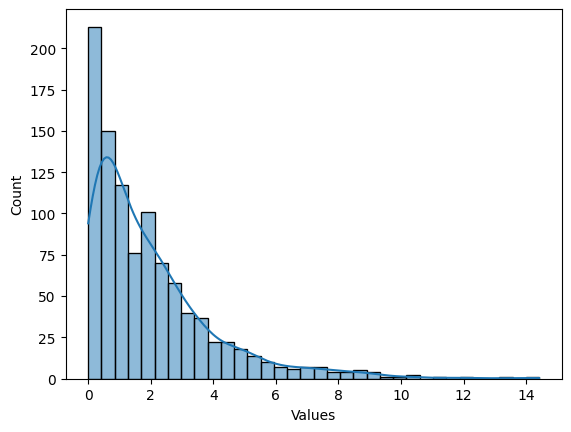

In [24]:
sns.histplot(df['Values'],kde=True)

In [25]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox=PowerTransformer(method='box-cox')
pt_yeo_johnson=PowerTransformer(method='yeo-johnson')
pt_quantile=QuantileTransformer(output_distribution='normal')
# data must be positive for johnson transformation

df['box-cox']=pt_boxcox.fit_transform(df[['Values']]+1)
df['yeo-johnson']=pt_yeo_johnson.fit_transform(df[['Values']])
df['Quantile']=pt_quantile.fit_transform(df[['Values']])
df


,Values,box-cox,yeo-johnson,Quantile
0,0.175417,-1.392542,-1.392542,-1.252988
1,3.501522,1.049691,1.049691,0.989697
2,0.787100,-0.500618,-0.500618,-0.397918
3,0.372806,-1.046301,-1.046301,-0.851675
4,1.841108,0.341616,0.341616,0.241963
...,...,...,...,...
995,3.375823,1.009420,1.009420,0.933910
996,0.711329,-0.586741,-0.586741,-0.469603
997,0.113450,-1.517964,-1.517964,-1.497997
998,1.572372,0.172731,0.172731,0.104318


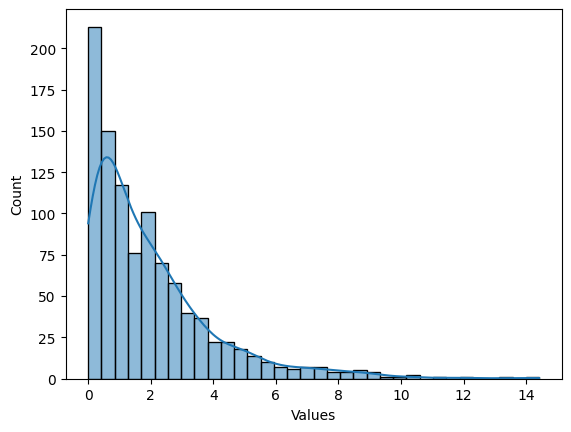

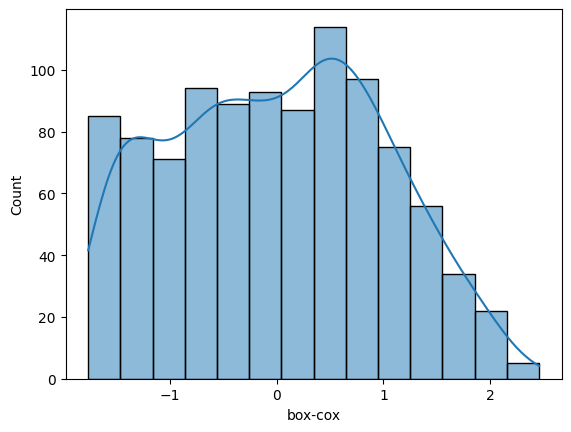

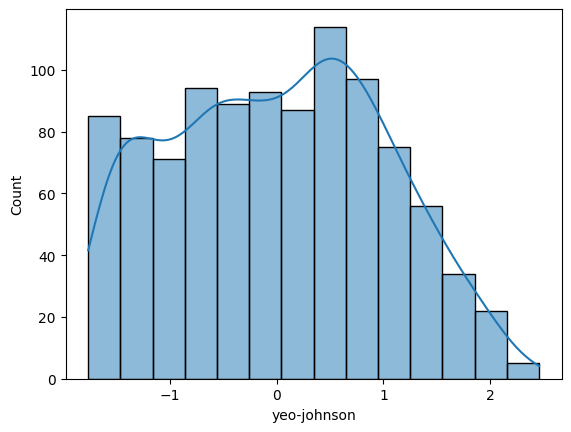

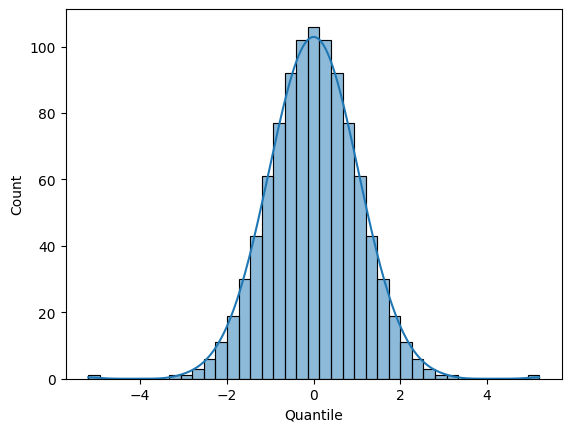

In [26]:
# create histogram for all columns using sns.hist and kde=True use a for loop
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

In [27]:
# quantile ===== box plot

--
# Normalization

In [35]:
from sklearn.preprocessing import Normalizer
df=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l2')
print(normalizer.fit_transform(df))

# l2 for text data calculated the square root of the sum of the squared vector values.
 

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [36]:
from sklearn.preprocessing import Normalizer
df=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l1')
print(normalizer.fit_transform(df))

# l1 ensure sum of the abs value is 1

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


## log Transformation

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df={'Values':[1,5,20,50,200,500,1000,5000,10000,50000,60000]}
df=pd.DataFrame(df)
df

,Values
0,1
1,5
2,20
3,50
4,200
5,500
6,1000
7,5000
8,10000
9,50000


<Axes: xlabel='Values', ylabel='Count'>

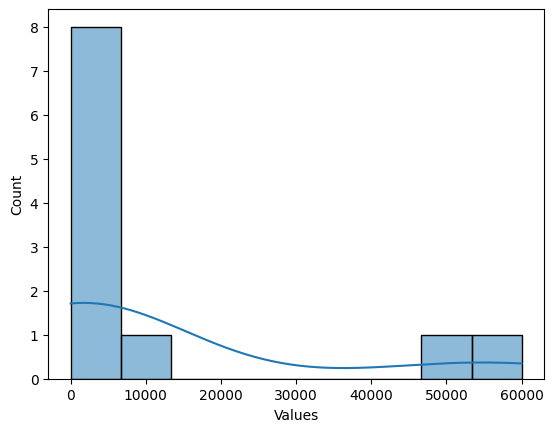

In [44]:
sns.histplot(df['Values'],kde=True)

In [47]:
df['log_Value']=np.log(df['Values'])
df

,Values,log_Value
0,1,0.000000
1,5,1.609438
2,20,2.995732
3,50,3.912023
4,200,5.298317
5,500,6.214608
6,1000,6.907755
7,5000,8.517193
8,10000,9.210340
9,50000,10.819778


<Axes: xlabel='log_Value', ylabel='Count'>

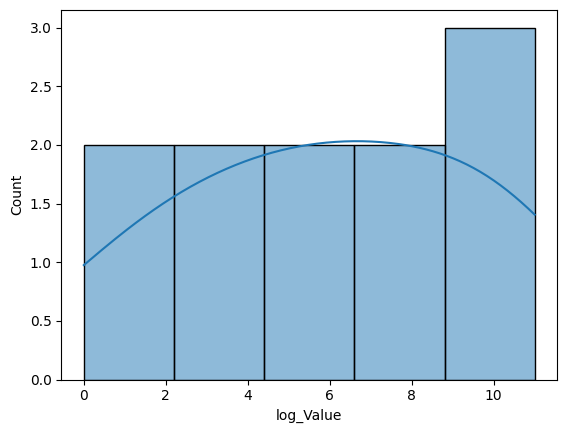

In [49]:
sns.histplot(df['log_Value'],kde=True)